In [4]:
import sys, os
import numpy as np 
import pandas as pd
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

# #1 Univariate Gaussian 

mean-0.001613432702964147, var:0.9908245572804426


Text(0.5, 1.0, 'PDF')

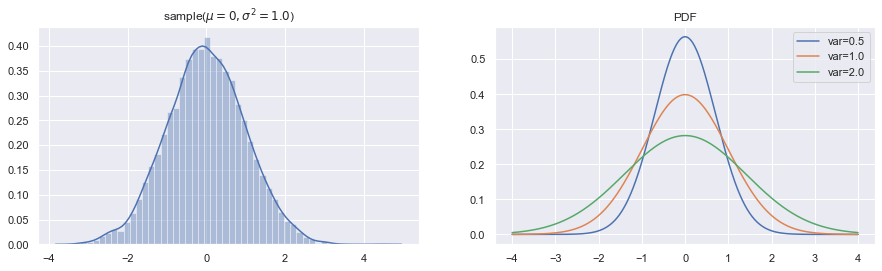

In [6]:
v1 = stats.norm.rvs(loc=0, scale=1.0, size=10000)
print("mean{}, var:{}".format(np.mean(v1), np.var(v1)))
fig = plt.figure(figsize=(15, 4))
ax = fig.subplots(1, 2)
sns.distplot(v1, ax=ax[0])
ax[0].set_title('sample($\mu=0, \sigma^2=1.0$)')

mu = 0
vs = [0.5, 1.0, 2.0]
xs = np.linspace(-4, 4, 1000)
for v in vs:
    pdf = stats.norm(loc=mu, scale=np.sqrt(v)).pdf(xs)
    ax[1].plot(xs, pdf, '-', label='var={}'.format(v))
ax[1].legend()
ax[1].set_title("PDF")

From uniform dist.

mean:0.0045454899236551174, var:1.0256948518257618


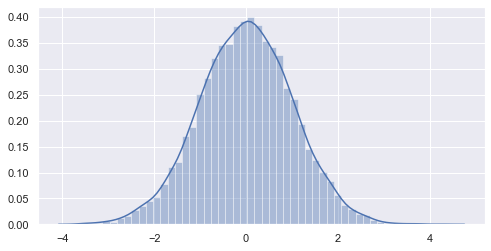

In [7]:
size = 10000
r1 = stats.uniform.rvs(loc=0, scale=1.0, size=size)
r2 = stats.uniform.rvs(loc=0, scale=1.0, size=size)
v2 = np.sqrt(-2*np.log(r1))*np.sin(2*np.pi*r2)
print('mean:{}, var:{}'.format(np.mean(v2), np.var(v2)))

fig = plt.figure(figsize=(8, 4))
ax = fig.subplots(1,1)
sns.distplot(v2, ax=ax)

# #2 Multivariate Gaussian

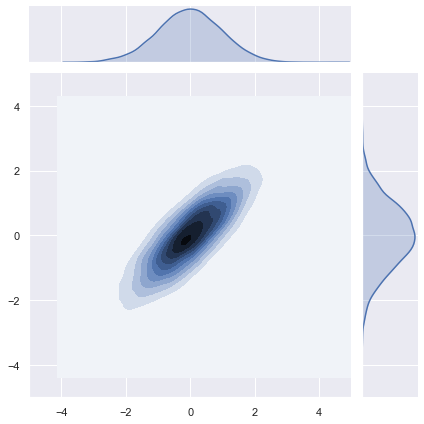

In [11]:
size = 10000
m = [0, 0]
v = [[1.0, 0.8], [0.8, 1.0]]
mvl = stats.multivariate_normal.rvs(mean=m, cov=v, size=size)

sns.jointplot(mvl[:, 0], mvl[:, 1], xlim=[-5.0, 5.0], ylim=[-5.0, 5.0], kind='kde')

# #3 Binomial Dist 

Text(0, 0.5, 'probability')

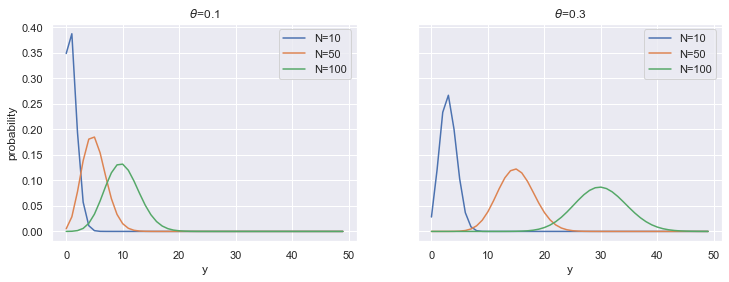

In [12]:
ys = np.arange(0, 50, 1)
ns = [10, 50, 100]
thetas = [0.1, 0.3]

fig = plt.figure(figsize=(12, 4))
ax = fig.subplots(1, 2, sharex=True, sharey=True)
for i, theta in enumerate(thetas):
    for j, n in enumerate(ns):
        pmf = stats.binom.pmf(ys, n, p=theta)
        ax[i].plot(ys, pmf, label="N={}".format(n))
    ax[i].legend()
    ax[i].set_xlabel('y')
    ax[i].set_title('$\\theta$={}'.format(theta))
ax[0].set_ylabel('probability')

# Baysian Linear Regression


In [13]:
def polynomial(x, degree):
    return [np.power(x, d) for d in np.arange(0, degree+1)]

(4,)
(4,)
(4,)
(4,)
(4,)


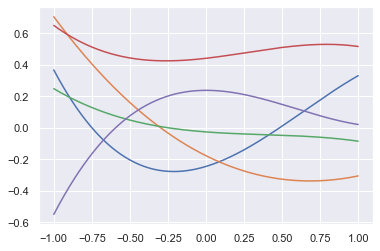

In [16]:
n_degree = 3
var_w = 0.1 
size = 5 # #Sample 

# Sample w from prior
m = np.zeros(n_degree+1)
v = var_w * np.identity(n_degree+1)
ws = stats.multivariate_normal.rvs(mean=m, cov=v, size=size)

# Plot
fig = plt.figure(figsize=(6, 4))
ax = fig.subplots(1, 1)
xs = np.linspace(-1.0, 1.0, 1000)
for w in ws:
    print(w.shape)
    sample_prior = list(map(lambda x: np.dot(w, polynomial(x=x, degree=n_degree)), xs))
    ax.plot(xs, sample_prior, '-')

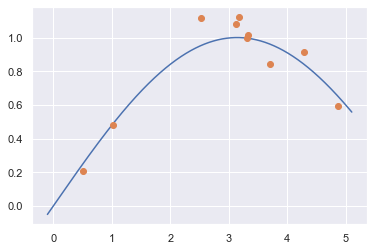

In [18]:
def true_func(x, params=None):
    y = params['gain'] * np.sin(x * params['omega'])
    return y

def observation_model(x, var=1.0, true_model_params=None):
    ty = true_func(x, params=true_model_params)
    y = stats.norm.rvs(loc=ty, scale=np.sqrt(var))
    return y

xmin, xmax = 0, 5
sample_x = xmin + (xmax-xmin)*np.random.rand(10) # gererate random sample

tfunc_params = {'gain':1., 'omega':0.5}
var_y = 0.01
sample_y = list(map(lambda x: observation_model(x, var=var_y, true_model_params=tfunc_params), sample_x))

# plot
fig = plt.figure(figsize=(6, 4))
ax = fig.subplots(1,1)
xs = np.linspace(xmin-0.1, xmax+0.1, 1000)
tys = list(map(lambda x:true_func(x, params=tfunc_params), xs))
ax.plot(xs, tys, '-')
ax.plot(sample_x, sample_y, 'o')

In [19]:
# Covariance matrix of the posterior dist
def outer_feature(x, degree=n_degree):
    feature = polynomial(x=x, degree=n_degree)
    return np.outer(feature, feature)

sum_feature = sum(map(outer_feature, sample_x))
S_hat_inv = (1.0/var_y) * sum_feature + (1.0/var_w) * np.identity((n_degree+1))
S_hat = np.linalg.inv(S_hat_inv)

# 事後分布の平均ベクトル
sum_yf = sum(map(lambda xy:np.array(polynomial(x=xy[0], degree=n_degree)) * xy[1], zip(sample_x, sample_y)))
tmp_ar = (1.0/var_y) * sum_yf
mu_hat = (np.dot(S_hat, tmp_ar[:,np.newaxis])).flatten()